# Эффективность алгоритмов в задаче коммивояжёра

$\textbf{Постановка задачи:}$ сравнить муравьиный алгоритм, алгоритм отжига и генетический алгоритм в задаче коммивояжера

$\textbf{Используемые инструменты:}$
библиотеки numpy, matplotlib и варианты реализации алгоритмов с github

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from aco_tsp import SolveTSPUsingACO
from anneal import SimAnneal
from visualize_tsp import plotTSP
from gen import tsp
from time import time

In [11]:
def gen_cities(n=20):
    X = np.random.ranf(n)*500
    Y = np.random.ranf(n)*500
    data = np.array([X, Y]).T
    def euqlidian_dist(p0, p1):
        return ((p0[0]-p1[0])**2 + (p0[1]-p1[1])**2)**0.5
    distmatrix = np.array([
        [
            euqlidian_dist(data[i], data[j])
            for j in range(len(data))
        ] 
        for i in range(len(data))
    ])
    return data, distmatrix

Рассмортим маршрут на 20 городов

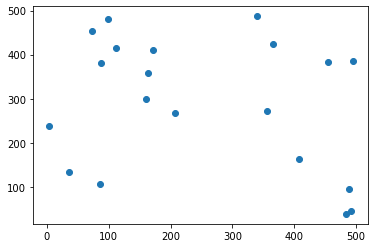

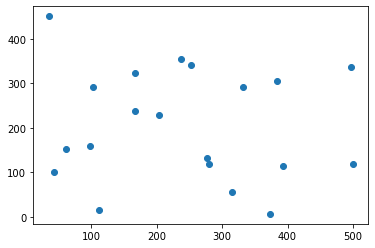

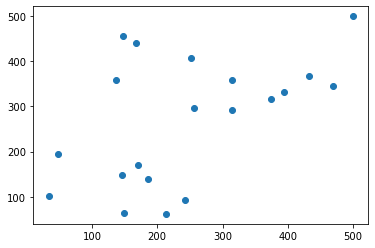

In [3]:
data_1, distmatrix_1 = gen_cities()
plt.scatter(data_1.T[0], data_1.T[1])
plt.show()
data_2, distmatrix_1 = gen_cities()
plt.scatter(data_2.T[0], data_2.T[1])
plt.show()
data_3, distmatrix_1 = gen_cities()
plt.scatter(data_3.T[0], data_3.T[1])
plt.show()

Муравьиный алгоритм:

Started : ACS
Ended : ACS
Sequence : <- 9 - 3 - 8 - 18 - 17 - 7 - 15 - 16 - 20 - 11 - 5 - 2 - 13 - 19 - 4 - 6 - 14 - 10 - 1 - 12 ->
Total distance travelled to complete the tour : 2064.56

Time:0.7530422210693359


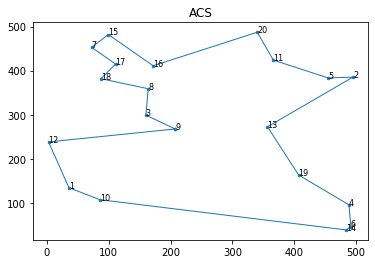

Started : ACS
Ended : ACS
Sequence : <- 9 - 18 - 10 - 8 - 4 - 11 - 2 - 16 - 3 - 15 - 14 - 1 - 17 - 12 - 13 - 19 - 20 - 5 - 7 - 6 ->
Total distance travelled to complete the tour : 1968.8

Time:0.7453446388244629


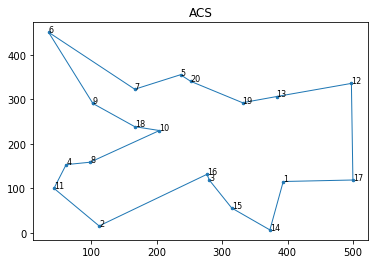

Started : ACS
Ended : ACS
Sequence : <- 13 - 19 - 8 - 2 - 1 - 4 - 9 - 5 - 20 - 14 - 16 - 11 - 12 - 15 - 7 - 3 - 18 - 10 - 6 - 17 ->
Total distance travelled to complete the tour : 1737.09

Time:0.7461400032043457


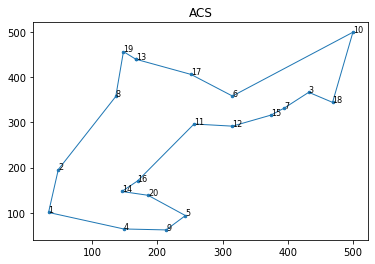

<Figure size 432x288 with 0 Axes>

In [4]:
acs = SolveTSPUsingACO(nodes=data_1, colony_size= 20)
t_start = time()
acs.run()
print("Time:%s" % (time()-t_start))
acs.plot()

acs = SolveTSPUsingACO(nodes=data_2, colony_size= 20)
t_start = time()
acs.run()
print("Time:%s" % (time()-t_start))
acs.plot()

acs = SolveTSPUsingACO(nodes=data_3, colony_size= 20)
t_start = time()
acs.run()
print("Time:%s" % (time()-t_start))
acs.plot()

Метод отжига:

Starting annealing.
Best fitness obtained:  2071.95922147018
Improvement over greedy heuristic:  0.00%
Time:0.2555263042449951
[8, 11, 0, 9, 13, 5, 3, 18, 12, 1, 4, 10, 19, 14, 6, 17, 16, 15, 7, 2]


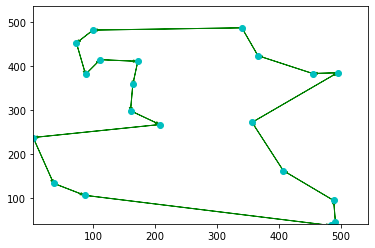

Starting annealing.
Best fitness obtained:  2034.9433592428431
Improvement over greedy heuristic:  12.95%
Time:0.2558412551879883
[8, 3, 10, 1, 7, 17, 9, 15, 2, 14, 13, 0, 16, 11, 12, 18, 19, 4, 6, 5]


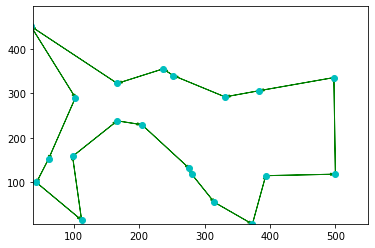

Starting annealing.
Best fitness obtained:  1765.5698787127
Improvement over greedy heuristic:  11.50%
Time:0.2571570873260498
[16, 12, 18, 7, 1, 0, 3, 8, 4, 19, 13, 15, 10, 11, 5, 14, 6, 2, 17, 9]


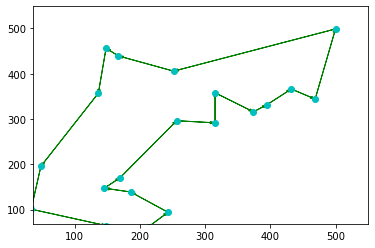

In [5]:
sa = SimAnneal(data_1, stopping_iter=5000)
t_start = time()
sa.anneal()
print("Time:%s" % (time()-t_start))
print(sa.best_solution)
sa.visualize_routes()

sa = SimAnneal(data_2, stopping_iter=5000)
t_start = time()
sa.anneal()
print("Time:%s" % (time()-t_start))
print(sa.best_solution)
sa.visualize_routes()

sa = SimAnneal(data_3, stopping_iter=5000)
t_start = time()
sa.anneal()
print("Time:%s" % (time()-t_start))
print(sa.best_solution)
sa.visualize_routes()

Генетический алгоритм

Best fitness 2480.42
[0, 5, 13, 3, 18, 12, 1, 4, 10, 19, 15, 7, 2, 8, 9, 11, 6, 14, 16, 17, 0]


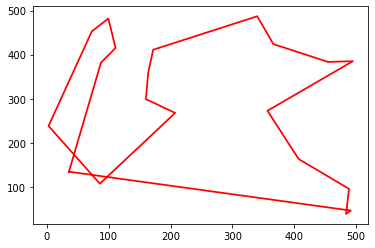

Time:9.48966121673584
Best fitness 2440.43
[0, 9, 4, 19, 18, 12, 11, 16, 13, 14, 2, 15, 1, 10, 3, 7, 17, 8, 5, 6, 0]


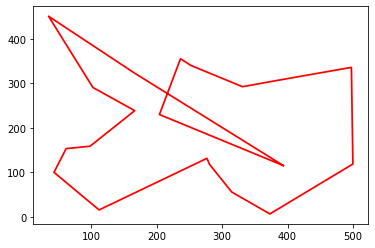

Time:9.502012014389038
Best fitness 2108.82
[0, 14, 6, 2, 17, 9, 5, 11, 10, 16, 12, 18, 7, 1, 13, 3, 8, 4, 19, 15, 0]


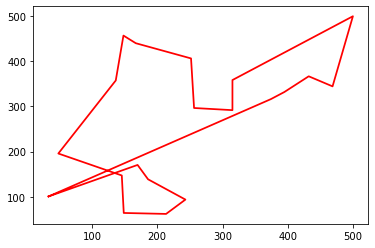

Time:9.531465291976929


In [6]:
t_start = time()
tsp(data_1)
print("Time:%s" % (time()-t_start))

t_start = time()
tsp(data_2)
print("Time:%s" % (time()-t_start))

t_start = time()
tsp(data_3)
print("Time:%s" % (time()-t_start))

На 20 городах лучше всего себя показал алгоритм отжига. Качество результатов в сравнении с муравьиным алгоритмом примерно одинаковое, но отжиг работает быстрее. Генетический алгоритм работал черезвычайно медленно и качетсво результатов также значительно уступает другим алгоритмам.

Рассмотрим маршрут на 60 городов

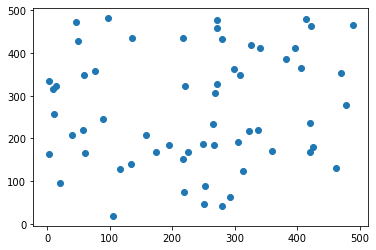

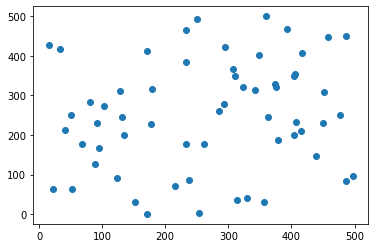

In [17]:
data_1, distmatrix_1 = gen_cities(n=60)
plt.scatter(data_1.T[0], data_1.T[1])
plt.show()
data_2, distmatrix_1 = gen_cities(n=60)
plt.scatter(data_2.T[0], data_2.T[1])
plt.show()

Муравьиный алгоритм:

Started : ACS
Ended : ACS
Sequence : <- 21 - 55 - 50 - 18 - 47 - 28 - 12 - 59 - 2 - 41 - 34 - 38 - 36 - 22 - 15 - 5 - 17 - 42 - 9 - 39 - 8 - 14 - 40 - 52 - 45 - 1 - 23 - 25 - 30 - 27 - 16 - 32 - 49 - 33 - 6 - 48 - 58 - 11 - 35 - 43 - 44 - 4 - 56 - 7 - 54 - 51 - 37 - 24 - 26 - 3 - 57 - 31 - 10 - 60 - 19 - 13 - 53 - 20 - 46 - 29 ->
Total distance travelled to complete the tour : 3178.3

Time:22.13672661781311


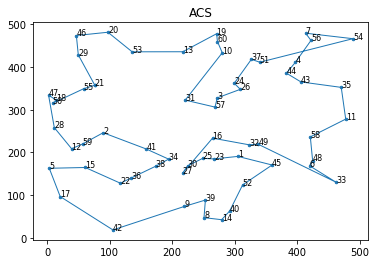

Started : ACS
Ended : ACS
Sequence : <- 55 - 18 - 30 - 35 - 36 - 14 - 48 - 52 - 37 - 50 - 27 - 3 - 21 - 60 - 28 - 40 - 58 - 33 - 12 - 43 - 54 - 44 - 22 - 9 - 25 - 10 - 1 - 4 - 56 - 45 - 13 - 7 - 51 - 31 - 32 - 26 - 24 - 15 - 20 - 59 - 17 - 16 - 38 - 8 - 46 - 57 - 47 - 41 - 11 - 5 - 49 - 39 - 53 - 42 - 6 - 19 - 2 - 29 - 34 - 23 ->
Total distance travelled to complete the tour : 3446.61

Time:22.28092670440674


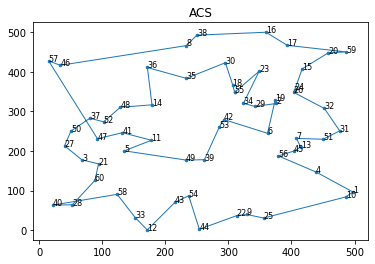

<Figure size 432x288 with 0 Axes>

In [18]:
acs = SolveTSPUsingACO(nodes=data_1, colony_size= 60)
t_start = time()
acs.run()
print("Time:%s" % (time()-t_start))
acs.plot()

acs = SolveTSPUsingACO(nodes=data_2, colony_size= 60)
t_start = time()
acs.run()
print("Time:%s" % (time()-t_start))
acs.plot()

Метод отжига:

Starting annealing.
Best fitness obtained:  3227.927095357083
Improvement over greedy heuristic:  9.16%
Time:0.7339518070220947
[50, 36, 9, 59, 18, 12, 52, 19, 45, 28, 20, 54, 46, 17, 49, 27, 11, 58, 1, 40, 35, 21, 41, 16, 4, 14, 37, 33, 26, 29, 24, 38, 8, 7, 13, 39, 51, 44, 48, 31, 0, 22, 15, 56, 30, 2, 25, 23, 57, 47, 5, 32, 10, 34, 53, 6, 55, 3, 42, 43]


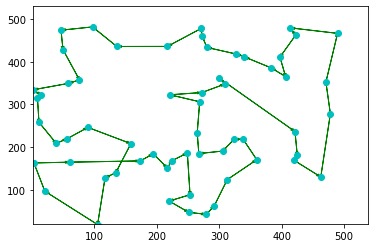

Starting annealing.
Best fitness obtained:  3663.888365775791
Improvement over greedy heuristic:  13.80%
Time:0.7122073173522949
[6, 5, 41, 52, 48, 38, 24, 8, 21, 43, 42, 53, 10, 40, 4, 20, 2, 59, 57, 32, 11, 27, 39, 26, 49, 46, 51, 36, 56, 45, 47, 13, 34, 35, 7, 37, 29, 22, 54, 17, 15, 16, 19, 58, 14, 23, 25, 33, 28, 18, 1, 31, 30, 50, 0, 9, 3, 55, 44, 12]


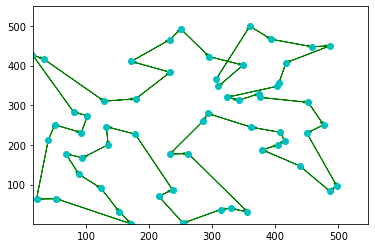

In [19]:
sa = SimAnneal(data_1, stopping_iter=5000)
t_start = time()
sa.anneal()
print("Time:%s" % (time()-t_start))
print(sa.best_solution)
sa.visualize_routes()

sa = SimAnneal(data_2, stopping_iter=5000)
t_start = time()
sa.anneal()
print("Time:%s" % (time()-t_start))
print(sa.best_solution)
sa.visualize_routes()

Генетический алгоритм

Best fitness 6355.21
[0, 19, 45, 49, 27, 58, 52, 12, 18, 25, 23, 50, 6, 55, 21, 16, 41, 7, 13, 8, 4, 20, 9, 36, 53, 42, 34, 10, 43, 3, 59, 56, 2, 15, 29, 22, 48, 44, 47, 5, 32, 57, 31, 26, 33, 28, 17, 46, 54, 30, 11, 14, 1, 40, 35, 37, 24, 38, 39, 51, 0]


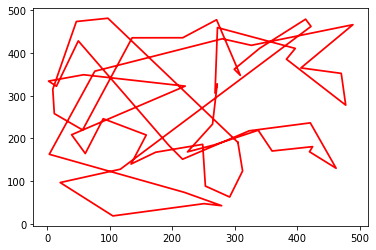

Time:27.546220541000366
Best fitness 7578.21
[0, 59, 2, 27, 39, 26, 49, 10, 20, 36, 13, 51, 45, 56, 7, 33, 1, 14, 31, 55, 21, 43, 11, 32, 48, 38, 30, 50, 9, 8, 24, 3, 58, 19, 29, 15, 5, 34, 52, 37, 16, 23, 6, 44, 4, 57, 42, 53, 46, 35, 40, 47, 17, 54, 41, 28, 12, 25, 22, 18, 0]


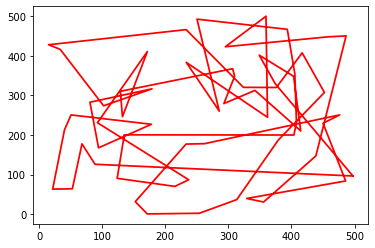

Time:26.858146905899048


In [20]:
t_start = time()
tsp(data_1)
print("Time:%s" % (time()-t_start))

t_start = time()
tsp(data_2)
print("Time:%s" % (time()-t_start))

На данном примере выйгриш по времени для отжига заметен ещё сильнее. Результата более меннее приемлемого качества, хотя есть места, в которых визуально можно понять, что можно улучшить путь. Муравьиный алгоритм выдал чуть лучшие результаты, но такого малого количетсва тестов недостаточно, чтобы говорить о постоянной тенденции. Ещё стоит заметить, что отстование генетического алгоритма по веремени от муравьиного практически невелировалось, но его результаты всё ещё довольно плохого качетсва.

Итоговая таблица для тестов с 20 городами:
| 20 | М путь | О путь | Г путь | М время | О время | Г время |
| :-: | :-------: | :-: | :-: | :-: | :-: | :-: |
| 1 | 2064 | 2072 | 2480 | 0.75 | 0.26 | 9.49 |
| 2 | 1968 | 2035 | 2440 | 0.75 | 0.26 | 9.50 |
| 3 | 1737 | 1766 | 2109 | 0.75 | 0.26 | 9.53 |

Итоговая таблица для тестов с 60 городами:
| 60 | М путь | О путь | Г путь | М время | О время | Г время |
| :-: | :-------: | :-: | :-: | :-: | :-: | :-: |
| 1 | 3178 | 3228 | 6355 | 22.14 | 0.73 | 27.55 |
| 2 | 3447 | 3664 | 7578 | 22.28 | 0.71 | 26.86 |

$\textbf{Вывод:}$ на рассмотернных данных алгоритм отжига показал себя наилучшим образом, имея лучшее время работы и при этом достаточно качетсвенные результаты. Муравьиный алгоритм имеет схожие или чуть лучшие по качеству результаты, но значительно проигрывает по скорости исполнения. Генетический алгоритм же показал себя не очень хорошо. Он работает дольше остальных и при этому него наблюдаются серьёзные проблемы с качеством результатов.